In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv('logistic_regression.csv')

In [4]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [5]:
df.iloc[:,9:18]

,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc
0,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0
1,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0
2,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0
3,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0
4,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0
...,...,...,...,...,...,...,...,...,...
396025,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0
396026,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0
396027,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0
396028,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0


In [6]:
df.iloc[:,18:]

,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...
396025,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [7]:
df.shape

(396030, 27)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [9]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [10]:
#For categoric variables, let us see their value counts
df['term'].value_counts()

term
 36 months    302005
 60 months     94025
Name: count, dtype: int64

## Data Cleaning - Converting categoric variable to numeric variable

In [11]:
df['term'].replace({" 36 months":36, " 60 months":60}, inplace = True)

In [12]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 396030, dtype: int64

In [13]:
df['grade'].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [14]:
#We are going to convert subgrade from Ordinal values to Numeric values
grade = df['sub_grade'].value_counts().index.sort_values()
grade

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2',
       'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4',
       'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object', name='sub_grade')

In [15]:
len(grade)

35

In [16]:
# We will assign more points to better grades and it decreases continuously to G5
pd.DataFrame({"grade_name": list(grade), "grade_value": list(range(len(grade),0,-1))})

,grade_name,grade_value
0,A1,35
1,A2,34
2,A3,33
3,A4,32
4,A5,31
5,B1,30
6,B2,29
7,B3,28
8,B4,27
9,B5,26


In [17]:
df["sub_grade"].replace(list(grade), list(range(len(grade),0,-1)), inplace = True)

In [18]:
# Since we already have the subgrade data, we will no more require the Grade data
df.drop(columns = ["grade"], inplace= True)

In [19]:
df['emp_title'].value_counts()

emp_title
Teacher                                   4389
Manager                                   4250
Registered Nurse                          1856
RN                                        1846
Supervisor                                1830
                                          ... 
Plus One Health Managment                    1
Comcast Corporate office                     1
Regional Counsel                             1
Social Work/Care Manager                     1
Director Bureau of Equipment Inventory       1
Name: count, Length: 173105, dtype: int64

In [20]:
# THis is the output variable, so we will convert it into 0 and 1. 
df['loan_status'].replace(['Fully Paid', 'Charged Off'], [1,0], inplace = True)

In [21]:
emp_title_target_enc = df.groupby('emp_title')['loan_status'].agg(['mean', 'count']).reset_index()
emp_title_target_enc

,emp_title,mean,count
0,NSA Industries llc,1.0,1
1,Fibro Source,1.0,1
2,Long Ilsand College Hospital,0.0,1
3,mortgage banker,0.0,1
4,Credit rev specialist,0.0,1
...,...,...,...
173100,zozaya officiating,0.0,1
173101,zs backroom,1.0,1
173102,zueck transportation,1.0,1
173103,zulily,0.0,1


## Feature Engineering on employee title. Converting categoric to numeric value using Target Encoding.

In [22]:
# Target Encoding has a tendency to overfit so we will be smoothening
# Formula : (n*mean_of_category + alpha*global_mean)/(n + alpha) 
# ---- where n is the count of rows in the category and alpha is a hyperparameter

global_mean = df['loan_status'].mean()
alpha = 10
emp_title_target_enc['target_enc'] = (emp_title_target_enc['count']*emp_title_target_enc['mean'] + alpha*global_mean)/(emp_title_target_enc['count'] + alpha)

In [23]:
emp_title_target_enc.sort_values( by = 'target_enc')

,emp_title,mean,count,target_enc
53991,G4S Secure Solutions,0.200000,10,0.501935
90660,Nurse assistant,0.000000,6,0.502419
51893,Floorhand,0.222222,9,0.528353
132550,Technition,0.142857,7,0.531689
158311,housekeeping,0.472222,36,0.544320
...,...,...,...,...
69179,Judge,1.000000,24,0.942315
10794,Associate Attorney,0.967742,62,0.944982
49643,Federal Bureau of Prisons,1.000000,26,0.945520
118392,Senior Systems Administrator,1.000000,28,0.948387


In [24]:
df = df.merge(emp_title_target_enc, left_on = 'emp_title', right_on = 'emp_title', how = 'left')
df

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,mean,count,target_enc
0,10000.0,36,11.44,329.48,27,Marketing,10+ years,RENT,117000.0,Not Verified,...,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0.752809,89.0,0.757967
1,8000.0,36,11.99,265.68,26,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0.666667,3.0,0.772208
2,15600.0,36,10.49,506.97,28,Statistician,< 1 year,RENT,43057.0,Source Verified,...,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0.818182,11.0,0.811367
3,7200.0,36,6.49,220.65,34,Client Advocate,6 years,RENT,54000.0,Not Verified,...,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1.000000,1.0,0.821701
4,24375.0,60,17.27,609.33,21,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0.000000,1.0,0.730792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,27,licensed bankere,2 years,RENT,40000.0,Source Verified,...,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1.000000,1.0,0.821701
396026,21000.0,36,12.29,700.42,25,Agent,5 years,MORTGAGE,110000.0,Source Verified,...,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",0.779570,186.0,0.780810
396027,5000.0,36,9.99,161.32,30,City Carrier,10+ years,RENT,56500.0,Verified,...,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",0.731343,67.0,0.740762
396028,21000.0,60,15.31,503.02,24,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,...,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1.000000,1.0,0.821701


In [25]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'mean', 'count',
       'target_enc'],
      dtype='object')

In [26]:
df.drop(columns = ['emp_title', 'mean', 'count'], inplace= True)

In [27]:
df.rename(columns = {'target_enc': 'emp_title'}, inplace = True)

In [28]:
df['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

In [29]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_1735/3304813693.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['emp_length'] = df['emp_length'].str.extract('(\d+)')


In [30]:
df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_title
0,10000.0,36,11.44,329.48,27,10,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0.757967
1,8000.0,36,11.99,265.68,26,4,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0.772208
2,15600.0,36,10.49,506.97,28,1,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0.811367
3,7200.0,36,6.49,220.65,34,6,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",0.821701
4,24375.0,60,17.27,609.33,21,9,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0.730792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,27,2,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",0.821701
396026,21000.0,36,12.29,700.42,25,5,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",0.780810
396027,5000.0,36,9.99,161.32,30,10,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",0.740762
396028,21000.0,60,15.31,503.02,24,10,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",0.821701


In [31]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

## One Hot Encoding on 'Home Ownership' column

In [32]:
df['mortage_one_hot'] = 0
df.loc[df['home_ownership'] == 'MORTGAGE','mortage_one_hot'] = 1

df['rent_one_hot'] = 0
df.loc[df['home_ownership'] == 'RENT','rent_one_hot'] = 1

df['own_home'] = 0
df.loc[df['home_ownership'] == 'OWN','own_home'] = 1
df.drop(columns = ['home_ownership', 'mort_acc'], inplace = True)

In [33]:
df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,...,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,address,emp_title,mortage_one_hot,rent_one_hot,own_home
0,10000.0,36,11.44,329.48,27,10,117000.0,Not Verified,Jan-2015,1,...,41.8,25.0,w,INDIVIDUAL,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0.757967,0,1,0
1,8000.0,36,11.99,265.68,26,4,65000.0,Not Verified,Jan-2015,1,...,53.3,27.0,f,INDIVIDUAL,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0.772208,1,0,0
2,15600.0,36,10.49,506.97,28,1,43057.0,Source Verified,Jan-2015,1,...,92.2,26.0,f,INDIVIDUAL,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0.811367,0,1,0
3,7200.0,36,6.49,220.65,34,6,54000.0,Not Verified,Nov-2014,1,...,21.5,13.0,f,INDIVIDUAL,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",0.821701,0,1,0
4,24375.0,60,17.27,609.33,21,9,55000.0,Verified,Apr-2013,0,...,69.8,43.0,f,INDIVIDUAL,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0.730792,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,27,2,40000.0,Source Verified,Oct-2015,1,...,34.3,23.0,w,INDIVIDUAL,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",0.821701,0,1,0
396026,21000.0,36,12.29,700.42,25,5,110000.0,Source Verified,Feb-2015,1,...,95.7,8.0,f,INDIVIDUAL,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",0.780810,1,0,0
396027,5000.0,36,9.99,161.32,30,10,56500.0,Verified,Oct-2013,1,...,66.9,23.0,f,INDIVIDUAL,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",0.740762,0,1,0
396028,21000.0,60,15.31,503.02,24,10,64000.0,Verified,Aug-2012,1,...,53.8,20.0,f,INDIVIDUAL,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",0.821701,1,0,0


In [34]:
df['verification_status'].value_counts()

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

In [35]:
df['verification_status'].replace(['Verified', 'Source Verified', 'Not Verified'], [1,1,0], inplace = True)

In [36]:
df['verification_status'].value_counts()

verification_status
1    270948
0    125082
Name: count, dtype: int64

In [37]:
# Issue date is ordinal values, so we will convert it to numeric values
df['issue_d'].value_counts()

issue_d
Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: count, Length: 115, dtype: int64

In [38]:
df['year'] = df['issue_d'].str.extract('(\d+)').astype('float64')
df['month'] = df['issue_d'].str.slice(0,3).replace(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']\
                                     , [1,2,3,4,5,6,7,8,9,10,11,12])/12
df['date']= df['year'] + df['month']

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_1735/3579227957.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['year'] = df['issue_d'].str.extract('(\d+)').astype('float64')


In [39]:
df.drop(columns = ['issue_d', 'year', 'month'], inplace = True)

In [40]:
df.iloc[:,9:18]

,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0
1,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0
2,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0
3,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0
4,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0
...,...,...,...,...,...,...,...,...,...
396025,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0
396026,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0
396027,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0
396028,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0


In [41]:
df.drop(columns = ['purpose'], inplace = True)

In [42]:
df.drop(columns = ['title'], inplace = True)

In [43]:
df['year'] = df['earliest_cr_line'].str.extract('(\d+)').astype('float64')
df['month'] = df['earliest_cr_line'].str.slice(0,3).replace(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']\
                                     , [1,2,3,4,5,6,7,8,9,10,11,12])/12
df['earliest_cr_line_date']= df['year'] + df['month']

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_1735/4040646995.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['year'] = df['earliest_cr_line'].str.extract('(\d+)').astype('float64')


In [44]:
df.drop(columns = ['earliest_cr_line', 'year', 'month'], inplace = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              396030 non-null  float64
 1   term                   396030 non-null  int64  
 2   int_rate               396030 non-null  float64
 3   installment            396030 non-null  float64
 4   sub_grade              396030 non-null  int64  
 5   emp_length             377729 non-null  object 
 6   annual_inc             396030 non-null  float64
 7   verification_status    396030 non-null  int64  
 8   loan_status            396030 non-null  int64  
 9   dti                    396030 non-null  float64
 10  open_acc               396030 non-null  float64
 11  pub_rec                396030 non-null  float64
 12  revol_bal              396030 non-null  float64
 13  revol_util             395754 non-null  float64
 14  total_acc              396030 non-nu

In [46]:
# We will convert pub rec and pub rec bankruptcy into just 0 and 1
df.loc[df['pub_rec'] >= 1, 'pub_rec'] = 1
df.loc[df['pub_rec'] != 1, 'pub_rec'] = 0

In [47]:
df.loc[df['pub_rec_bankruptcies'] >= 1, 'pub_rec_bankruptcies'] = 1
df.loc[df['pub_rec_bankruptcies'] != 1, 'pub_rec_bankruptcies'] = 0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              396030 non-null  float64
 1   term                   396030 non-null  int64  
 2   int_rate               396030 non-null  float64
 3   installment            396030 non-null  float64
 4   sub_grade              396030 non-null  int64  
 5   emp_length             377729 non-null  object 
 6   annual_inc             396030 non-null  float64
 7   verification_status    396030 non-null  int64  
 8   loan_status            396030 non-null  int64  
 9   dti                    396030 non-null  float64
 10  open_acc               396030 non-null  float64
 11  pub_rec                396030 non-null  float64
 12  revol_bal              396030 non-null  float64
 13  revol_util             395754 non-null  float64
 14  total_acc              396030 non-nu

In [49]:
# One hot encoding
df['initial_list_status'].replace(['w', 'f'], [0,1], inplace = True)

In [50]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [51]:
df['application_type'].replace(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], [1,0,1], inplace = True)

In [52]:
df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,loan_status,dti,...,initial_list_status,application_type,pub_rec_bankruptcies,address,emp_title,mortage_one_hot,rent_one_hot,own_home,date,earliest_cr_line_date
0,10000.0,36,11.44,329.48,27,10,117000.0,0,1,26.24,...,0,1,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0.757967,0,1,0,2015.083333,1990.500000
1,8000.0,36,11.99,265.68,26,4,65000.0,0,1,22.05,...,1,1,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0.772208,1,0,0,2015.083333,2004.583333
2,15600.0,36,10.49,506.97,28,1,43057.0,1,1,12.79,...,1,1,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0.811367,0,1,0,2015.083333,2007.666667
3,7200.0,36,6.49,220.65,34,6,54000.0,0,1,2.60,...,1,1,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",0.821701,0,1,0,2014.916667,2006.750000
4,24375.0,60,17.27,609.33,21,9,55000.0,1,0,33.95,...,1,1,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0.730792,1,0,0,2013.333333,1999.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,27,2,40000.0,1,1,15.63,...,0,1,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",0.821701,0,1,0,2015.833333,2004.916667
396026,21000.0,36,12.29,700.42,25,5,110000.0,1,1,21.45,...,1,1,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",0.780810,1,0,0,2015.166667,2006.166667
396027,5000.0,36,9.99,161.32,30,10,56500.0,1,1,17.56,...,1,1,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",0.740762,0,1,0,2013.833333,1997.250000
396028,21000.0,60,15.31,503.02,24,10,64000.0,1,1,15.88,...,1,1,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",0.821701,1,0,0,2012.666667,1990.916667


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              396030 non-null  float64
 1   term                   396030 non-null  int64  
 2   int_rate               396030 non-null  float64
 3   installment            396030 non-null  float64
 4   sub_grade              396030 non-null  int64  
 5   emp_length             377729 non-null  object 
 6   annual_inc             396030 non-null  float64
 7   verification_status    396030 non-null  int64  
 8   loan_status            396030 non-null  int64  
 9   dti                    396030 non-null  float64
 10  open_acc               396030 non-null  float64
 11  pub_rec                396030 non-null  float64
 12  revol_bal              396030 non-null  float64
 13  revol_util             395754 non-null  float64
 14  total_acc              396030 non-nu

## Treating missing values

In [54]:
df.isna().sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
sub_grade                    0
emp_length               18301
annual_inc                   0
verification_status          0
loan_status                  0
dti                          0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                 276
total_acc                    0
initial_list_status          0
application_type             0
pub_rec_bankruptcies         0
address                      0
emp_title                22927
mortage_one_hot              0
rent_one_hot                 0
own_home                     0
date                         0
earliest_cr_line_date        0
dtype: int64

In [55]:
df['emp_title'].fillna(df['emp_title'].mean(),inplace = True)

<Axes: ylabel='revol_util'>

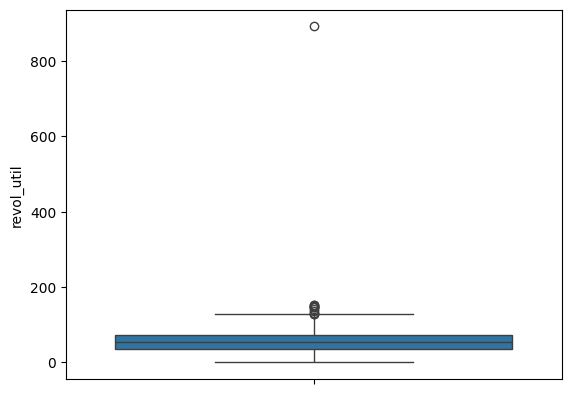

In [56]:
sns.boxplot(y = df['revol_util'])

In [57]:
df['revol_util'].fillna(df['revol_util'].median(),inplace = True)

## Data preparation and preprocessing

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns = ['address']))

In [60]:
scaled_data = pd.DataFrame(scaled_data, columns = df.drop(columns = ['address']).columns)

In [61]:
scaled_data

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,loan_status,dti,...,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,emp_title,mortage_one_hot,rent_one_hot,own_home,date,earliest_cr_line_date
0,-0.492243,-0.557975,-0.491799,-0.408291,0.467127,1.130888,0.694330,-1.471789,0.493944,0.491728,...,-0.034891,-1.227636,0.032777,-0.358558,-0.840629,-1.001683,1.215911,-0.32458,0.625314,-1.100040
1,-0.731551,-0.557975,-0.368816,-0.662750,0.315634,-0.575068,-0.149311,-1.471789,0.493944,0.259197,...,0.133361,0.814574,0.032777,-0.358558,-0.568821,0.998320,-0.822428,-0.32458,0.625314,0.855880
2,0.177819,-0.557975,-0.704225,0.299609,0.618620,-1.428046,-0.505312,0.679445,0.493944,-0.254703,...,0.049235,0.814574,0.032777,-0.358558,0.178541,-1.001683,1.215911,-0.32458,0.625314,1.284099
3,-0.827274,-0.557975,-1.598649,-0.842348,1.527580,-0.006416,-0.327774,-1.471789,0.493944,-0.820215,...,-1.044399,0.814574,0.032777,-0.358558,0.375765,-1.001683,1.215911,-0.32458,0.510556,1.156791
4,1.227783,1.792196,0.811824,0.707861,-0.441833,0.846562,-0.311550,0.679445,-2.024520,0.919608,...,1.479372,0.814574,0.032777,-0.358558,-1.359277,0.998320,-0.822428,-0.32458,-0.579648,0.115177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,-0.492243,1.792196,-0.592422,-0.855390,0.467127,-1.143720,-0.554908,0.679445,0.493944,-0.097092,...,-0.203142,-1.227636,0.032777,-0.358558,0.375765,-1.001683,1.215911,-0.32458,1.141726,0.902174
396026,0.823951,-0.557975,-0.301734,1.071164,0.164140,-0.290742,0.580763,0.679445,0.493944,0.225899,...,-1.465027,0.814574,0.032777,-0.358558,-0.404661,0.998320,-0.822428,-0.32458,0.682693,1.075776
396027,-1.090513,-0.557975,-0.816028,-1.078979,0.921607,1.130888,-0.287214,0.679445,0.493944,0.010016,...,-0.203142,0.814574,0.032777,-0.358558,-1.168981,-1.001683,1.215911,-0.32458,-0.235373,-0.162587
396028,0.823951,1.792196,0.373556,0.283855,0.012647,1.130888,-0.165535,0.679445,0.493944,-0.083218,...,-0.455519,0.814574,0.032777,-0.358558,0.375765,0.998320,-0.822428,-0.32458,-1.038681,-1.042172


## Filling missing values using KNN Imputer

### The reason we have done normalisation before imputing is because KNN is a distance based algorithm. So we want all features to be equally important. We don't want a single feature to dominate.

In [62]:
from sklearn.impute import KNNImputer

In [63]:
imputer = KNNImputer(n_neighbors = 12)
df_imputed = imputer.fit_transform(scaled_data)
df_imputed = pd.DataFrame(df_imputed, columns = scaled_data.columns)
df_imputed

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,loan_status,dti,...,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,emp_title,mortage_one_hot,rent_one_hot,own_home,date,earliest_cr_line_date
0,-0.492243,-0.557975,-0.491799,-0.408291,0.467127,1.130888,0.694330,-1.471789,0.493944,0.491728,...,-0.034891,-1.227636,0.032777,-0.358558,-0.840629,-1.001683,1.215911,-0.32458,0.625314,-1.100040
1,-0.731551,-0.557975,-0.368816,-0.662750,0.315634,-0.575068,-0.149311,-1.471789,0.493944,0.259197,...,0.133361,0.814574,0.032777,-0.358558,-0.568821,0.998320,-0.822428,-0.32458,0.625314,0.855880
2,0.177819,-0.557975,-0.704225,0.299609,0.618620,-1.428046,-0.505312,0.679445,0.493944,-0.254703,...,0.049235,0.814574,0.032777,-0.358558,0.178541,-1.001683,1.215911,-0.32458,0.625314,1.284099
3,-0.827274,-0.557975,-1.598649,-0.842348,1.527580,-0.006416,-0.327774,-1.471789,0.493944,-0.820215,...,-1.044399,0.814574,0.032777,-0.358558,0.375765,-1.001683,1.215911,-0.32458,0.510556,1.156791
4,1.227783,1.792196,0.811824,0.707861,-0.441833,0.846562,-0.311550,0.679445,-2.024520,0.919608,...,1.479372,0.814574,0.032777,-0.358558,-1.359277,0.998320,-0.822428,-0.32458,-0.579648,0.115177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,-0.492243,1.792196,-0.592422,-0.855390,0.467127,-1.143720,-0.554908,0.679445,0.493944,-0.097092,...,-0.203142,-1.227636,0.032777,-0.358558,0.375765,-1.001683,1.215911,-0.32458,1.141726,0.902174
396026,0.823951,-0.557975,-0.301734,1.071164,0.164140,-0.290742,0.580763,0.679445,0.493944,0.225899,...,-1.465027,0.814574,0.032777,-0.358558,-0.404661,0.998320,-0.822428,-0.32458,0.682693,1.075776
396027,-1.090513,-0.557975,-0.816028,-1.078979,0.921607,1.130888,-0.287214,0.679445,0.493944,0.010016,...,-0.203142,0.814574,0.032777,-0.358558,-1.168981,-1.001683,1.215911,-0.32458,-0.235373,-0.162587
396028,0.823951,1.792196,0.373556,0.283855,0.012647,1.130888,-0.165535,0.679445,0.493944,-0.083218,...,-0.455519,0.814574,0.032777,-0.358558,0.375765,0.998320,-0.822428,-0.32458,-1.038681,-1.042172


## Univariate Analysis

<Axes: xlabel='loan_amnt', ylabel='Density'>

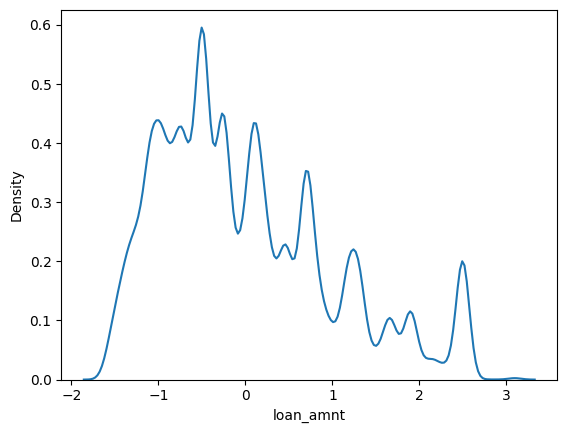

In [64]:
sns.kdeplot(x = df_imputed['loan_amnt'])

### Treating outliers by clipping

/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_1735/970610851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_amnt'][df['loan_amnt'] >=3] = 3


<Axes: xlabel='loan_amnt', ylabel='Density'>

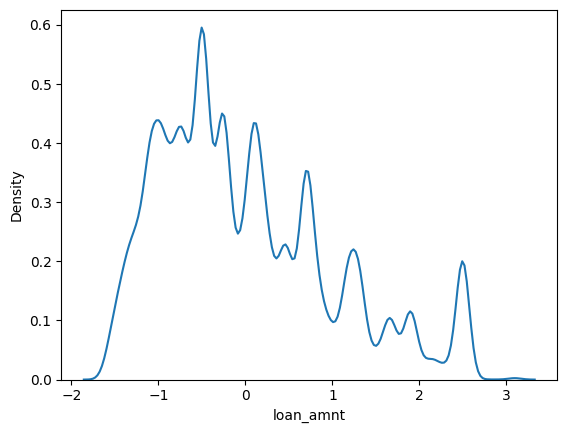

In [65]:
df['loan_amnt'][df['loan_amnt'] >=3] = 3
sns.kdeplot(x = df_imputed['loan_amnt'])

In [66]:
df['loan_amnt'].max()

3.0

In [ ]:
for columns in df_imputed.columns:
    sns.kdeplot(x = df_imputed[columns])
    plt.show()

## Visualising outliers using Box plots

In [ ]:
for columns in df_imputed.columns:
    sns.boxplot(y = df_imputed[columns])
    plt.show()

In [69]:
df_imputed.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'annual_inc', 'verification_status', 'loan_status', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'pub_rec_bankruptcies',
       'emp_title', 'mortage_one_hot', 'rent_one_hot', 'own_home', 'date',
       'earliest_cr_line_date'],
      dtype='object')

## Feature Engineering - Transforming the data

### For variables which have skewed distribution, we will use box-cox transformation

In [70]:
from scipy.stats import boxcox
scaler = StandardScaler()
def trans(df):
    df = df - np.min(df) +1
    for col in df.columns:
        df[col], lambda_ = boxcox(df[col])
        df_ = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
        
    return df_
    

### For variables which are normally distributed, we will perform clipping to remove outliers

In [74]:
def clip(df):
    for col in df.columns:
        df.loc[df[col]>=3,col] = 3
        df.loc[df[col]<=-3,col] = -3
    return df

In [ ]:
df_boc_cox = trans(df_imputed[['annual_inc','dti', 'open_acc','revol_bal', 'revol_util', 'total_acc']])
df_clip = clip(df_imputed[['loan_amnt', 'int_rate', 'installment', 'sub_grade','emp_title', 'date', 'earliest_cr_line_date']])
df_lef_out = df[['term', 'verification_status', 'loan_status', 'pub_rec', 
                'initial_list_status','pub_rec_bankruptcies',
                'mortage_one_hot', 'rent_one_hot', 'own_home', 'application_type']]

df_new = pd.concat([df_boc_cox, df_clip, df_lef_out], axis = 1)
for columns in df_new.columns:
    sns.kdeplot(x = df_new[columns])
    plt.show()

In [ ]:
df_new[['annual_inc','dti', 'open_acc','revol_bal', 'revol_util', 'total_acc']] = clip(df_new[['annual_inc','dti', 'open_acc','revol_bal', 'revol_util', 'total_acc']])
for columns in df_new.columns:
    sns.kdeplot(x = df_new[columns])
    plt.show()

## Treating Outliers in multi-dimensional plane using Gaussian Mixture Models

In [78]:
from sklearn.mixture import GaussianMixture

### Before we perform GMM, we need to understand how many classes exist in the dataset. To find the optimum number we find out the AIC and BIC score and find the elbow point.

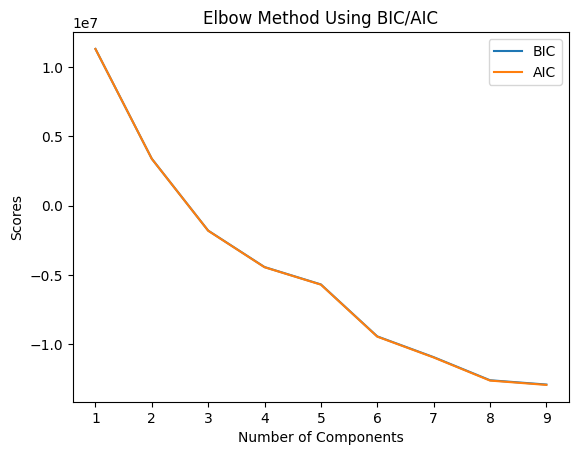

In [80]:
bics = []
aics = []
for n in range(1,10):
    gmm = GaussianMixture(n_components = n)
    gmm.fit(df_new.drop(columns = 'loan_status'))
    bics.append(gmm.bic(df_new.drop(columns = 'loan_status')))
    aics.append(gmm.aic(df_new.drop(columns = 'loan_status')))

plt.plot( np.arange(1,10), bics, label='BIC')
plt.plot( np.arange(1,10), aics, label='AIC')
plt.xlabel('Number of Components')
plt.ylabel('Scores')
plt.legend()
plt.title('Elbow Method Using BIC/AIC')
plt.show()

### As we can see we don't find any significant decline in AIC/BIC. But our intuition tells us that it should be 2 classes - the ones who fully paid the loan and ones who didn't.

In [84]:
gmm = GaussianMixture(n_components = 2)
gmm.fit(df_new.drop(columns = 'loan_status'))
prob = gmm.score_samples(df_new.drop(columns = 'loan_status'))

In [89]:
threshold = np.percentile(prob, 1)

### Let us remove the data points whose probability of lying inside the cluster is less than 1%

In [91]:
df_new = df_new[prob >= threshold]

## Bivariate Analysis

In [ ]:
sns.pairplot(df_new, size = 4)

<Axes: >

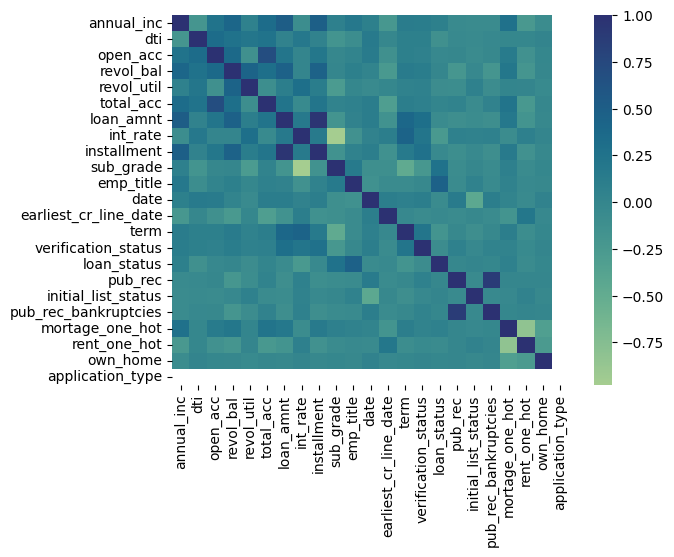

In [93]:
x

In [54]:
# The above pairplot contains too many columns, so let us only focus on what is relavant.

In [ ]:
sns.pairplot(df_new[['annual_inc','dti', 'open_acc','revol_bal', 'revol_util', 'total_acc','loan_amnt', 'int_rate', 'installment', 'sub_grade','emp_title', 'date', 'earliest_cr_line_date']], size = 4)

In [55]:
# This still looks unreadable, so let us play around with point sizes.

In [ ]:
sns.scatterplot(x = df_new['loan_amnt'], y = df_new['annual_inc'], size = 0.2)

In [ ]:
sns.scatterplot(x = df_new['loan_amnt'], y = df_new['annual_inc'], s = 0.2)

In [ ]:
df2 = df_new[['annual_inc','dti', 'open_acc','revol_bal', 'revol_util', 'total_acc','loan_amnt', 'int_rate', 'installment', 'sub_grade','emp_title', 'date', 'earliest_cr_line_date']]
n = len(df2.columns)
for i in range(n):
    if i == (n-1):
        break
    for j in range(i+1,n):
        sns.scatterplot(x = df2.iloc[:,i], y = df2.iloc[:,j], s = 0.4)
        plt.show()

In [105]:
n = len(df2.columns)
df2.iloc[:,3]

0         1.546721
1         0.771260
2         0.047435
3        -0.855094
4         1.049019
            ...   
396025   -1.526823
396026    1.736422
396027    1.420199
396028    0.420028
396029   -1.064561
Name: revol_bal, Length: 392069, dtype: float64

In [109]:
df_new.drop(columns = ['installment', 'sub_grade', 'pub_rec_bankruptcies'],inplace = True)

## Let us drop duplicate values

In [116]:
df_new.drop_duplicates(inplace = True)

In [117]:
df_new

,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,loan_amnt,int_rate,emp_title,date,earliest_cr_line_date,term,verification_status,loan_status,pub_rec,initial_list_status,mortage_one_hot,rent_one_hot,own_home,application_type
0,1.221826,1.081457,1.000450,1.546721,-0.498104,0.118440,-0.492243,-0.491799,-0.840629,0.625314,-1.100040,36,0,1,0.0,0,0,1,0,1
1,0.040022,0.628910,1.146471,0.771260,-0.028143,0.287092,-0.731551,-0.368816,-0.568821,0.625314,0.855880,36,0,1,0.0,1,1,0,0,1
2,-0.812425,-0.505303,0.506486,0.047435,1.584173,0.203864,0.177819,-0.704225,0.178541,0.625314,1.284099,36,1,1,0.0,1,0,1,0,1
3,-0.348535,-2.043472,-1.179456,-0.855094,-1.317655,-1.133916,-0.827274,-1.598649,0.375765,0.510556,1.156791,36,0,1,0.0,1,0,1,0,1
4,-0.310274,1.836211,0.506486,1.049019,0.651903,1.390271,1.227783,0.811824,-1.359277,-0.579648,0.115177,60,1,0,0.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,-0.958631,-0.135229,-1.179456,-1.526823,-0.802534,-0.059481,-0.492243,-0.592422,0.375765,1.141726,0.902174,60,1,1,0.0,0,0,1,0,1
396026,1.106544,0.561320,-1.179456,1.736422,1.730664,-1.842867,0.823951,-0.301734,-0.404661,0.682693,1.075776,36,1,1,0.0,1,1,0,0,1
396027,-0.254052,0.104430,0.845793,1.420199,0.531935,-0.059481,-1.090513,-0.816028,-1.168981,-0.235373,-0.162587,36,1,1,0.0,1,0,1,0,1
396028,0.007453,-0.103666,-0.332918,0.420028,-0.007631,-0.346147,0.823951,0.373556,0.375765,-1.038681,-1.042172,60,1,1,0.0,1,1,0,0,1


## Checking for Multicollinearity

In [119]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Add a constant to the predictors
df_new = sm.add_constant(df_new)

# Calculate VIF scores
vif_data = pd.DataFrame()
vif_data['Feature'] = df_new.columns
vif_data['VIF'] = [variance_inflation_factor(df_new.values, i) for i in range(df_new.shape[1])]

# Display the VIF scores
print(vif_data)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                  Feature       VIF
0              annual_inc  1.916954
1                     dti  1.528316
2                open_acc  2.401096
3               revol_bal  2.343151
4              revol_util  1.753073
5               total_acc  2.299320
6               loan_amnt  1.909349
7                int_rate  1.627638
8               emp_title  1.333348
9                    date  1.386505
10  earliest_cr_line_date  1.244496
11                   term  1.499687
12    verification_status  1.154925
13            loan_status  1.352833
14                pub_rec  1.113557
15    initial_list_status  1.273909
16        mortage_one_hot       inf
17           rent_one_hot       inf
18               own_home       inf
19       application_type  0.000000


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [121]:
# Looks like rent_one_hot column is easily predictable by other vatiables, so lets drop it and again run the vif
df_new2 = df_new.drop(columns = [ 'rent_one_hot'])

# Calculate VIF scores
vif_data = pd.DataFrame()
vif_data['Feature'] = df_new2.columns
vif_data['VIF'] = [variance_inflation_factor(df_new2.values, i) for i in range(df_new2.shape[1])]

# Display the VIF scores
print(vif_data)

                  Feature        VIF
0              annual_inc   1.916954
1                     dti   1.528316
2                open_acc   2.401096
3               revol_bal   2.343151
4              revol_util   1.753073
5               total_acc   2.299320
6               loan_amnt   1.909349
7                int_rate   1.627638
8               emp_title   1.333348
9                    date   1.386505
10  earliest_cr_line_date   1.244496
11                   term   1.499687
12    verification_status   1.154925
13            loan_status   1.352833
14                pub_rec   1.113557
15    initial_list_status   1.273909
16        mortage_one_hot   1.279780
17               own_home   1.141232
18       application_type  39.618399


In [122]:
df_new2 = df_new.drop(columns = [ 'rent_one_hot', 'application_type'])

# Calculate VIF scores
vif_data = pd.DataFrame()
vif_data['Feature'] = df_new2.columns
vif_data['VIF'] = [variance_inflation_factor(df_new2.values, i) for i in range(df_new2.shape[1])]

# Display the VIF scores
print(vif_data)

                  Feature       VIF
0              annual_inc  1.916938
1                     dti  1.528184
2                open_acc  2.388082
3               revol_bal  2.339744
4              revol_util  1.731083
5               total_acc  2.285436
6               loan_amnt  1.797020
7                int_rate  1.451097
8               emp_title  1.296468
9                    date  1.377008
10  earliest_cr_line_date  1.242594
11                   term  8.373868
12    verification_status  3.480185
13            loan_status  5.635092
14                pub_rec  1.293214
15    initial_list_status  2.868932
16        mortage_one_hot  2.531061
17               own_home  1.247506


In [123]:
df_new2 = df_new.drop(columns = [ 'rent_one_hot', 'application_type','term'])

# Calculate VIF scores
vif_data = pd.DataFrame()
vif_data['Feature'] = df_new2.columns
vif_data['VIF'] = [variance_inflation_factor(df_new2.values, i) for i in range(df_new2.shape[1])]

# Display the VIF scores
print(vif_data)

                  Feature       VIF
0              annual_inc  1.913093
1                     dti  1.527863
2                open_acc  2.387958
3               revol_bal  2.339650
4              revol_util  1.727972
5               total_acc  2.284524
6               loan_amnt  1.776380
7                int_rate  1.364235
8               emp_title  1.226035
9                    date  1.371504
10  earliest_cr_line_date  1.239720
11    verification_status  2.901844
12            loan_status  3.905802
13                pub_rec  1.290547
14    initial_list_status  2.673744
15        mortage_one_hot  2.283420
16               own_home  1.213701


In [125]:
# We see that these 3 columns have a high vif, so lets drop them and
df_new.drop(columns = [ 'rent_one_hot', 'application_type','term'], inplace = True)

In [148]:
df_new

,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,loan_amnt,int_rate,emp_title,date,earliest_cr_line_date,verification_status,loan_status,pub_rec,initial_list_status,mortage_one_hot,own_home
0,1.221826,1.081457,1.000450,1.546721,-0.498104,0.118440,-0.492243,-0.491799,-0.840629,0.625314,-1.100040,0,1,0.0,0,0,0
1,0.040022,0.628910,1.146471,0.771260,-0.028143,0.287092,-0.731551,-0.368816,-0.568821,0.625314,0.855880,0,1,0.0,1,1,0
2,-0.812425,-0.505303,0.506486,0.047435,1.584173,0.203864,0.177819,-0.704225,0.178541,0.625314,1.284099,1,1,0.0,1,0,0
3,-0.348535,-2.043472,-1.179456,-0.855094,-1.317655,-1.133916,-0.827274,-1.598649,0.375765,0.510556,1.156791,0,1,0.0,1,0,0
4,-0.310274,1.836211,0.506486,1.049019,0.651903,1.390271,1.227783,0.811824,-1.359277,-0.579648,0.115177,1,0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,-0.958631,-0.135229,-1.179456,-1.526823,-0.802534,-0.059481,-0.492243,-0.592422,0.375765,1.141726,0.902174,1,1,0.0,0,0,0
396026,1.106544,0.561320,-1.179456,1.736422,1.730664,-1.842867,0.823951,-0.301734,-0.404661,0.682693,1.075776,1,1,0.0,1,1,0
396027,-0.254052,0.104430,0.845793,1.420199,0.531935,-0.059481,-1.090513,-0.816028,-1.168981,-0.235373,-0.162587,1,1,0.0,1,0,0
396028,0.007453,-0.103666,-0.332918,0.420028,-0.007631,-0.346147,0.823951,0.373556,0.375765,-1.038681,-1.042172,1,1,0.0,1,1,0


## Building the base model

### Let us evaluate the model on recall, precision, accuracy, f1 score and specifity using K Folf cross validation.

In [3]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, make_scorer

In [4]:
def specificity(y_true, y_pred):
    tn = np.sum(y_pred[y_true == 0]==0)
    fp = np.sum(y_pred[y_true == 0]==1)
    return tn/(tn+fp)

In [7]:
model = LogisticRegression()
kfold = KFold(n_splits = 5)
x_train, x_test, y_train, y_test = train_test_split(df_new.drop(columns = 'loan_status'), df_new['loan_status'], test_size = 0.2)
specificity = make_scorer(specificity)
scoring = {
    'recall': 'recall',
    'precision': 'precision',
    'accuracy': 'accuracy',
    'f1_score': 'f1',
    'specificity': specificity
}

results = cross_validate(estimator = model, X = x_train, y = y_train, scoring = scoring, cv = kfold)

In [51]:
results

{'fit_time': array([0.41666675, 0.41862988, 0.44450092, 0.3990798 , 0.39305496]),
 'score_time': array([0.03732204, 0.03639603, 0.03877211, 0.03370905, 0.03579593]),
 'test_recall': array([0.94888496, 0.94754995, 0.9465958 , 0.94755723, 0.94683359]),
 'test_precision': array([0.86610477, 0.86652769, 0.8686138 , 0.86701607, 0.86669326]),
 'test_accuracy': array([0.84121088, 0.84044571, 0.84138624, 0.84092395, 0.84001275]),
 'test_f1_score': array([0.9056071 , 0.90522947, 0.90592974, 0.90549921, 0.90499271]),
 'test_specificity': array([0.40302247, 0.40055361, 0.40191467, 0.40265559, 0.39968972])}

In [52]:
print('recall', np.mean(results['test_recall']))
print('precision', np.mean(results['test_precision']))
print('accuracy', np.mean(results['test_accuracy']))
print('f1 score', np.mean(results['test_f1_score']))
print('specificity', np.mean(results['test_specificity']))

recall 0.947484306818626
precision 0.8669911170052262
accuracy 0.8407959063708631
f1 score 0.9054516442534428
specificity 0.40156721011208896


## We see that model is performing really well on recall, precision, f1 score. But very poorly on specificity. This shows that the model is not able to classifiy negative class (here it is 0).

In [10]:
# Let us save the final dataset
df_new.to_csv('df_new_loan_tab', index = False)

In [5]:
df_new = pd.read_csv('df_new_loan_tap')

In [12]:
df_new

,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,loan_amnt,int_rate,emp_title,date,earliest_cr_line_date,verification_status,loan_status,pub_rec,initial_list_status,mortage_one_hot,own_home
0,1.221826,1.081457,1.000450,1.546721,-0.498104,0.118440,-0.492243,-0.491799,-0.840629,0.625314,-1.100040,0,1,0.0,0,0,0
1,0.040022,0.628910,1.146471,0.771260,-0.028143,0.287092,-0.731551,-0.368816,-0.568821,0.625314,0.855880,0,1,0.0,1,1,0
2,-0.812425,-0.505303,0.506486,0.047435,1.584173,0.203864,0.177819,-0.704225,0.178541,0.625314,1.284099,1,1,0.0,1,0,0
3,-0.348535,-2.043472,-1.179456,-0.855094,-1.317655,-1.133916,-0.827274,-1.598649,0.375765,0.510556,1.156791,0,1,0.0,1,0,0
4,-0.310274,1.836211,0.506486,1.049019,0.651903,1.390271,1.227783,0.811824,-1.359277,-0.579648,0.115177,1,0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392063,-0.958631,-0.135229,-1.179456,-1.526823,-0.802534,-0.059481,-0.492243,-0.592422,0.375765,1.141726,0.902174,1,1,0.0,0,0,0
392064,1.106544,0.561320,-1.179456,1.736422,1.730664,-1.842867,0.823951,-0.301734,-0.404661,0.682693,1.075776,1,1,0.0,1,1,0
392065,-0.254052,0.104430,0.845793,1.420199,0.531935,-0.059481,-1.090513,-0.816028,-1.168981,-0.235373,-0.162587,1,1,0.0,1,0,0
392066,0.007453,-0.103666,-0.332918,0.420028,-0.007631,-0.346147,0.823951,0.373556,0.375765,-1.038681,-1.042172,1,1,0.0,1,1,0


In [13]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [14]:
model.coef_

array([[ 0.0947243 , -0.17269881, -0.18112777,  0.09063865, -0.14223899,
         0.08807614, -0.20165356, -0.48793512,  1.23014622,  0.10170187,
         0.05862076, -0.23038896,  0.04725662, -0.00738709,  0.29912027,
         0.15965224]])

In [15]:
df_new.columns

Index(['annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'loan_amnt', 'int_rate', 'emp_title', 'date', 'earliest_cr_line_date',
       'verification_status', 'loan_status', 'pub_rec', 'initial_list_status',
       'mortage_one_hot', 'own_home'],
      dtype='object')

## Printing the coefficients of the variables

In [16]:
pd.DataFrame({'columns': df_new.drop(columns = 'loan_status').columns, 'coefficients':model.coef_[0]})

,columns,coefficients
0,annual_inc,0.094724
1,dti,-0.172699
2,open_acc,-0.181128
3,revol_bal,0.090639
4,revol_util,-0.142239
5,total_acc,0.088076
6,loan_amnt,-0.201654
7,int_rate,-0.487935
8,emp_title,1.230146
9,date,0.101702


## Let us find the optimum threshold for classification.

In [17]:
y_pred = model.predict_proba(x_train)[:,1]

In [12]:
threshold = np.linspace(0,1,101)

In [19]:
tpr = []
fpr = []
for t in threshold:
    y_tr = np.array(y_train)
    y_pr = np.where(y_pred>=t,1,0)
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y_pr)):
        if ((y_pr[i] == 1) and (y_tr[i] == 1)):
            tp = tp +1
        elif ((y_pr[i] == 0) and (y_tr[i] == 1)):
            fn = fn +1
        elif ((y_pr[i] == 0) and (y_tr[i] == 0)):
            tn = tn +1
        else:
            fp = fp +1
    fpr.append(fp/(fp+tn))
    tpr.append(tp/(tp+fn))

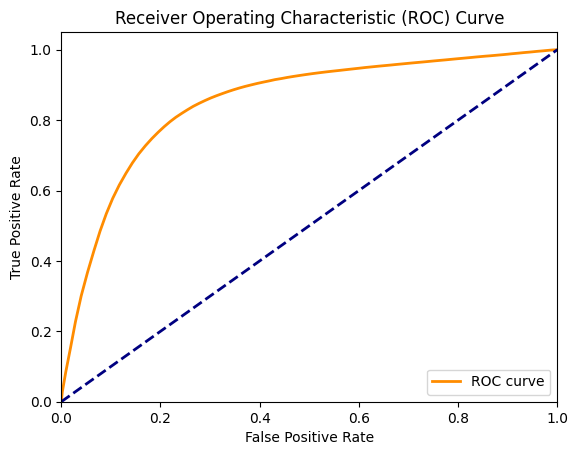

In [20]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve' )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### We see that the model is performing better than a randomly guessing model. The optimum threshold would be something near the top left corner which maximises TPR but minimises FPR.

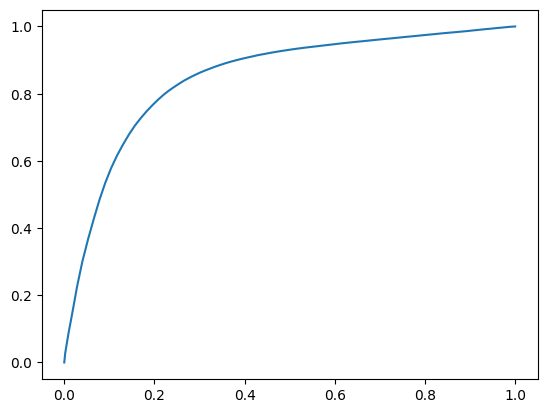

In [21]:
plt.plot(fpr, tpr)

## Let us make precision recall curve.

In [22]:
recall = []
precision = []
for t in threshold[0:-1]:
    y_tr = np.array(y_train)
    y_pr = np.where(y_pred>=t,1,0)
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y_pr)):
        if ((y_pr[i] == 1) and (y_tr[i] == 1)):
            tp = tp +1
        elif ((y_pr[i] == 0) and (y_tr[i] == 1)):
            fn = fn +1
        elif ((y_pr[i] == 0) and (y_tr[i] == 0)):
            tn = tn +1
        else:
            fp = fp +1
    precision.append(tp/(tp+fp))
    recall.append(tp/(tp+fn))

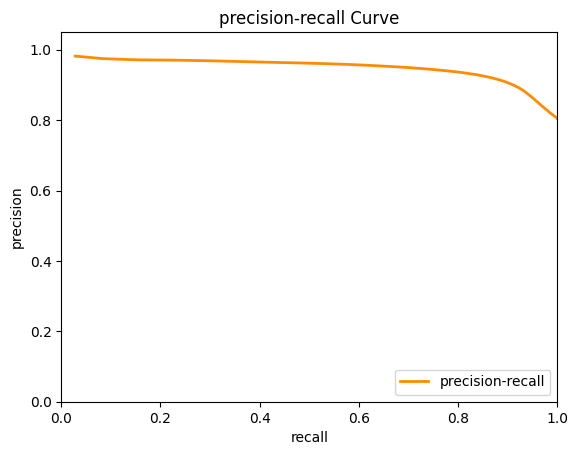

In [23]:
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='precision-recall' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision-recall Curve')
plt.legend(loc="lower right")
plt.show()

## Let us make precision recall curve using sklearn

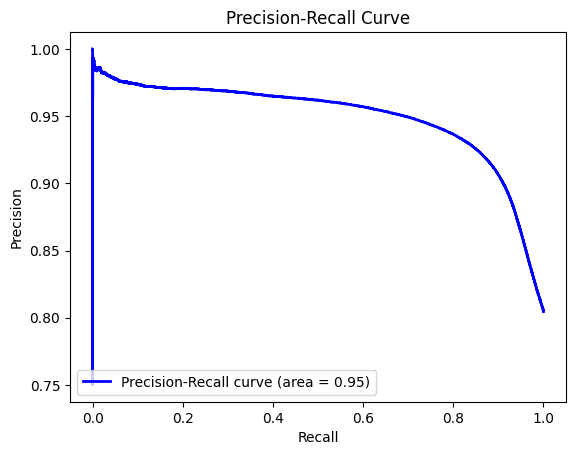

In [24]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(y_train, y_pred)
average_precision = average_precision_score(y_train, y_pred)

plt.figure()
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

## Let us find the optimum threshold for maximising the f1 score.

Best Threshold by F1 Score: 0.578998824546087


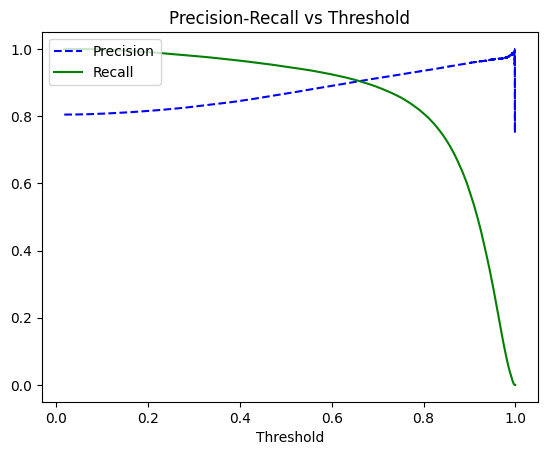

In [25]:
precision, recall, thresholds = precision_recall_curve(y_train, y_pred)
f1_scores = 2*recall*precision / (recall + precision)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print('Best Threshold by F1 Score:', optimal_threshold)

# Plotting Precision-Recall Curve
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.title('Precision-Recall vs Threshold')
plt.show()

In [26]:
y_pred = model.predict_proba(x_test)[:,1]
y_tr = np.array(y_test)
y_pr = np.where(y_pred>=optimal_threshold,1,0)
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(len(y_pr)):
    if ((y_pr[i] == 1) and (y_tr[i] == 1)):
        tp = tp +1
    elif ((y_pr[i] == 0) and (y_tr[i] == 1)):
        fn = fn +1
    elif ((y_pr[i] == 0) and (y_tr[i] == 0)):
        tn = tn +1
    else:
        fp = fp +1
recall = tp/(tp+fn)
precision = tp/(tp+fp)
specificity = tn/(tn + fp)
accuracy = (tp+tn)/(tp+fp+tn+fn)
f1_score = 2*recall*precision/(precision + recall)


In [27]:
recall, precision, specificity, accuracy, f1_score

(0.9311127693016019,
 0.8851993841881245,
 0.5069683023270889,
 0.8476675083531002,
 0.9075757692992162)

## We see that tuning the threshold gives us a better model with respect to specificity and f1 score.

## Confusion matrix for the base model

In [28]:
confusion_matrix = pd.DataFrame({"Actual positives": [tp,fn], "Actual negatives": [fp,tn]})
confusion_matrix.index = ["Predicted positives", "Predicted negatives"]

In [29]:
confusion_matrix

,Actual positives,Actual negatives
Predicted positives,58648,7606
Predicted negatives,4339,7821


In [30]:
100*confusion_matrix/(tp+tn+fp+fn)

,Actual positives,Actual negatives
Predicted positives,74.792767,9.699799
Predicted negatives,5.533451,9.973984


### We observe one very important point here - the model is not able to classify negative class. This is shown by a large false positive value from the confusion matrix. This is also proved by low value of specificity. The key reason for this is that negative class is the minority class making up just 20% of the total data. 
### To overcome this we will have to do 2 things:
### 1. Oversample the minority class using SMOTE
### 2. Balancing the weight of minority class in the cost function.

In [31]:
pip install imbalanced-learn



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

### We will only sample the minority class to 50% of the majority class. The reason being, if we had done too much oversampling, the model will overfit.

In [33]:
# We are using SMOTE + ENN model
smote = SMOTE(sampling_strategy = 0.5)
smote_enn = SMOTEENN(smote = smote)

In [34]:
x_train_s, y_train_s = smote_enn.fit_resample(x_train, y_train)

In [35]:
x_train

,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,loan_amnt,int_rate,emp_title,date,earliest_cr_line_date,verification_status,pub_rec,initial_list_status,mortage_one_hot,own_home
34680,0.134742,1.861027,1.284699,1.616962,-0.326887,1.560922,1.927759,0.811824,0.375765,-0.694407,-0.255175,1,0.0,1,0,1
4557,-0.508132,-0.725103,-1.525402,0.523430,1.108524,-1.842867,0.225681,0.501012,0.375765,-0.292752,1.191511,0,0.0,1,0,0
73535,-0.025633,-0.270836,-0.332918,0.807576,0.850858,-1.399227,0.883778,0.373556,1.416091,-1.325577,0.265632,1,0.0,1,0,0
251815,-1.008226,-1.105712,-1.525402,-0.031858,0.263711,-1.540481,0.270551,0.878906,-2.239838,0.051522,0.879027,1,0.0,1,0,0
186849,1.053953,-0.921165,1.284699,0.293704,-0.927835,0.600118,-0.252935,-1.569580,0.375765,-1.210819,-1.204201,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210801,1.106544,-1.028049,-0.098196,-0.956983,-0.806581,-0.888663,1.302567,0.353432,-1.359277,-0.292752,0.531822,1,0.0,1,0,1
374815,1.342036,0.262046,-0.869301,-1.441984,1.291829,-0.059481,1.778191,0.592690,0.239309,0.281039,-1.817596,1,0.0,0,0,1
197150,0.339573,-0.296752,-1.525402,0.082765,0.908975,-0.772655,-0.252935,-0.368816,0.812416,0.567935,0.196191,0,0.0,1,0,0
11556,-0.310274,-0.013638,0.118420,0.628501,0.070374,-1.008973,-0.731551,-0.212292,-1.261517,0.797451,-0.289896,0,0.0,0,0,1


In [36]:
# We have the oversampled data
x_train_s

,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,loan_amnt,int_rate,emp_title,date,earliest_cr_line_date,verification_status,pub_rec,initial_list_status,mortage_one_hot,own_home
0,-1.008226,-1.105712,-1.525402,-0.031858,0.263711,-1.540481,0.270551,0.878906,-2.239838,0.051522,0.879027,1,0.0,1,0,0
1,0.713702,0.467747,1.000450,0.151194,-0.073249,0.745960,2.403384,3.000000,-0.698000,1.141726,0.798013,1,1.0,1,1,0
2,-1.468813,-0.747367,-0.869301,0.021530,0.560876,-1.008973,-0.611897,-0.558881,-1.359277,-0.464890,0.578116,0,0.0,1,1,0
3,-2.581226,-1.208251,-1.915469,-1.628079,-0.640389,-2.547860,-0.827274,-0.431425,-1.359277,-1.669852,1.341967,1,0.0,1,0,0
4,1.268269,-0.707071,-1.915469,-1.812563,1.158481,-2.356778,-0.492243,1.645874,-1.359277,-0.464890,1.457701,1,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264021,-1.920064,-0.413382,-1.915469,-1.026202,0.921434,-1.842867,-1.090513,-0.867457,0.000000,-1.382956,1.098923,1,0.0,1,1,0
264022,-0.958631,-0.398850,0.506486,0.298743,0.354388,-0.552393,-0.252935,-0.833916,0.659341,-1.555094,0.531822,1,0.0,1,0,0
264023,-0.170479,0.277473,0.118420,0.686518,1.504737,0.447389,-0.492243,0.749214,0.090684,0.453176,-0.069999,1,0.0,1,0,0
264024,1.342036,0.262046,-0.869301,-1.441984,1.291829,-0.059481,1.778191,0.592690,0.239309,0.281039,-1.817596,1,0.0,0,0,1


In [47]:
y_train.value_counts()

loan_status
1    252354
0     61300
Name: count, dtype: int64

In [48]:
y_train_s.value_counts()

loan_status
1    175584
0     88442
Name: count, dtype: int64

In [83]:
def specificity(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    tn = np.sum(y_pred[y_true == 0]==0)
    fp = np.sum(y_pred[y_true == 0]==1)
    return tn/(tn+fp)

### Let's again train a new model which is able to balance the minority class in cost function and hopefully give us better results

In [53]:
model_weight_balance = LogisticRegression(class_weight = "balanced")
kfold = KFold(n_splits = 5)
scoring = {
    'recall': 'recall',
    'precision': 'precision',
    'accuracy': 'accuracy',
    'f1_score': 'f1',
    'specificity': specificity
}

results = cross_validate(estimator = model_weight_balance, X = x_train_s, y = y_train_s, scoring = scoring, cv = kfold)
results

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_47161/4233513908.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return tn/(tn+fp)
/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_47161/4233513908.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return tn/(tn+fp)
/var/folders/tx/1rbx7xzs2xn_hvqwj21v8cth0000gn/T/ipykernel_47161/4233513908.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return tn/(tn+fp)


{'fit_time': array([0.40029788, 0.40426588, 0.38127017, 0.40839815, 0.40671206]),
 'score_time': array([0.29715204, 0.19349003, 0.05885482, 0.03536892, 0.03951192]),
 'test_recall': array([0.        , 0.92381618, 0.9172995 , 0.91889026, 0.91839788]),
 'test_precision': array([0.        , 0.75124331, 1.        , 1.        , 1.        ]),
 'test_accuracy': array([0.89715184, 0.87576934, 0.9172995 , 0.91889026, 0.91839788]),
 'test_f1_score': array([0.        , 0.82864009, 0.95686615, 0.95773091, 0.9574634 ]),
 'test_specificity': array([0.89715184, 0.85262095,        nan,        nan,        nan])}

### This is giving us very good result, but the issue here is we are evaluating it on train data where there is a high chance of overfitting. Let us test on test data.

In [76]:
model_weight_balance = LogisticRegression(class_weight = "balanced")
model_weight_balance.fit(x_train_s, y_train_s)

LogisticRegression(class_weight='balanced')

In [56]:
y_pred_train = model_weight_balance.predict(x_train_s)
y_pred_test = model_weight_balance.predict(x_test)

In [74]:
print("recall train = %f, recall test = %f" %(recall_score(y_train_s, y_pred_train), recall_score(y_test, y_pred_test)))
print("accuracy train = %f, accuracy test = %f" %(accuracy_score(y_train_s, y_pred_train), accuracy_score(y_test, y_pred_test)))
print("precision train = %f, precision test = %f" %(precision_score(y_train_s, y_pred_train), precision_score(y_test, y_pred_test)))
print("f1 score train = %f, f1 score test = %f" %(f1_score(y_train_s, y_pred_train), f1_score(y_test, y_pred_test)))
print("specificity train = %f, specificity test = %f" %(specificity(y_train_s, y_pred_train), specificity(y_test, y_pred_test)))

recall train = 0.918142, recall test = 0.789677
accuracy train = 0.904820, accuracy test = 0.790968
precision train = 0.937448, precision test = 0.940546
f1 score train = 0.927694, f1 score test = 0.858534
specificity train = 0.878372, specificity test = 0.796241


## The model is now much better at specificity. But there is a big difference in train and test data metrics. This hints at overfitting.

### Let us create another model without smote and just using the weight balance. This will hopefully give us better results without overfitting.

In [77]:
model2 = LogisticRegression(class_weight = "balanced")
model2.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [78]:
y_pred_train = model2.predict(x_train)
y_pred_test = model2.predict(x_test)

In [79]:
print("recall train = %f, recall test = %f" %(recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test)))
print("accuracy train = %f, accuracy test = %f" %(accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)))
print("precision train = %f, precision test = %f" %(precision_score(y_train, y_pred_train), precision_score(y_test, y_pred_test)))
print("f1 score train = %f, f1 score test = %f" %(f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)))
print("specificity train = %f, specificity test = %f" %(specificity(y_train, y_pred_train), specificity(y_test, y_pred_test)))

recall train = 0.808379, recall test = 0.808412
accuracy train = 0.801278, accuracy test = 0.801898
precision train = 0.935896, precision test = 0.936250
f1 score train = 0.867476, f1 score test = 0.867647
specificity train = 0.772044, specificity test = 0.775308


### Model 2 gives us very good result on both positive and negative class without overfitting.

In [81]:
# This is the base model metrics
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("recall train = %f, recall test = %f" %(recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test)))
print("accuracy train = %f, accuracy test = %f" %(accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)))
print("precision train = %f, precision test = %f" %(precision_score(y_train, y_pred_train), precision_score(y_test, y_pred_test)))
print("f1 score train = %f, f1 score test = %f" %(f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)))
print("specificity train = %f, specificity test = %f" %(specificity(y_train, y_pred_train), specificity(y_test, y_pred_test)))

recall train = 0.947550, recall test = 0.946542
accuracy train = 0.840907, accuracy test = 0.840641
precision train = 0.867056, precision test = 0.867207
f1 score train = 0.905518, f1 score test = 0.905139
specificity train = 0.401863, specificity test = 0.408360


### Let us train another model without ENN and with just regular SMOTE.

In [82]:
smote = SMOTE(sampling_strategy = 0.5)
x_train_s, y_train_s = smote.fit_resample(x_train, y_train)
model_weight_balance = LogisticRegression(class_weight = "balanced")
kfold = KFold(n_splits = 5)
scoring = {
    'recall': 'recall',
    'precision': 'precision',
    'accuracy': 'accuracy',
    'f1_score': 'f1',
    'specificity': specificity
}

results = cross_validate(estimator = model_weight_balance, X = x_train_s, y = y_train_s, scoring = scoring, cv = kfold)
results

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: specificity() takes 2 positional arguments but 3 were given

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/si

{'fit_time': array([0.53799176, 0.57677698, 0.58870912, 0.5776062 , 0.57711601]),
 'score_time': array([0.05669618, 0.0458169 , 0.04612303, 0.04545593, 0.35125613]),
 'test_recall': array([0.81310887, 0.81227443, 0.80920342, 0.81100447, 0.80641453]),
 'test_precision': array([0.93376295, 0.93648692, 0.93677867, 0.93262525, 0.32829465]),
 'test_accuracy': array([0.80369054, 0.80449628, 0.80198661, 0.80100915, 0.78817018]),
 'test_f1_score': array([0.8692692 , 0.86996934, 0.86833022, 0.86757325, 0.46662454]),
 'test_specificity': array([nan, nan, nan, nan, nan])}

In [85]:
model_weight_balance.fit(x_train_s, y_train_s)

LogisticRegression(class_weight='balanced')

In [8]:
y_pred_train = model_weight_balance.predict(x_train_s)
y_pred_test = model_weight_balance.predict(x_test)

NameError: name 'model_weight_balance' is not defined

In [87]:
print("recall train = %f, recall test = %f" %(recall_score(y_train_s, y_pred_train), recall_score(y_test, y_pred_test)))
print("accuracy train = %f, accuracy test = %f" %(accuracy_score(y_train_s, y_pred_train), accuracy_score(y_test, y_pred_test)))
print("precision train = %f, precision test = %f" %(precision_score(y_train_s, y_pred_train), precision_score(y_test, y_pred_test)))
print("f1 score train = %f, f1 score test = %f" %(f1_score(y_train_s, y_pred_train), f1_score(y_test, y_pred_test)))
print("specificity train = %f, specificity test = %f" %(specificity(y_train_s, y_pred_train), specificity(y_test, y_pred_test)))

recall train = 0.810847, recall test = 0.811031
accuracy train = 0.799746, accuracy test = 0.802790
precision train = 0.879373, precision test = 0.934814
f1 score train = 0.843721, f1 score test = 0.868535
specificity train = 0.777544, specificity test = 0.769151


### This model is surprisingly performing really well, but we are compromising on specificity.

## So the best model that gave us the best result is Model2 which is having weight balancing.

In [21]:
from sklearn.metrics import confusion_matrix
model2 = LogisticRegression(class_weight = "balanced")
model2.fit(x_train, y_train)


LogisticRegression(class_weight='balanced')

In [ ]:
y_pred_train = model2.predict(x_train)
y_pred_test = model2.predict(x_test)

## Let us tune the threshold.

In [11]:
y_pred = model2.predict_proba(x_train)[:,1]

In [13]:
tpr = []
fpr = []
for t in threshold:
    y_tr = np.array(y_train)
    y_pr = np.where(y_pred>=t,1,0)
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y_pr)):
        if ((y_pr[i] == 1) and (y_tr[i] == 1)):
            tp = tp +1
        elif ((y_pr[i] == 0) and (y_tr[i] == 1)):
            fn = fn +1
        elif ((y_pr[i] == 0) and (y_tr[i] == 0)):
            tn = tn +1
        else:
            fp = fp +1
    fpr.append(fp/(fp+tn))
    tpr.append(tp/(tp+fn))

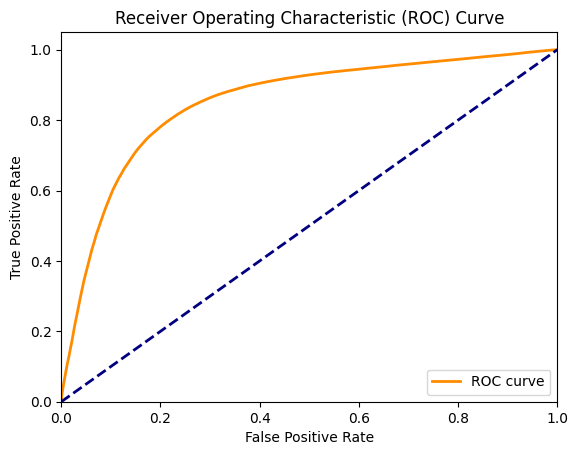

In [14]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve' )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

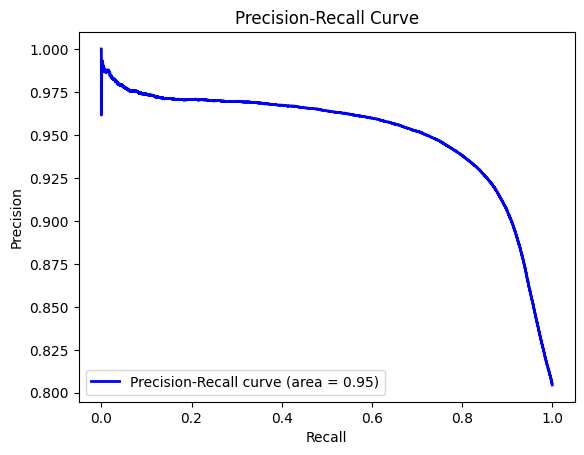

In [15]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(y_train, y_pred)
average_precision = average_precision_score(y_train, y_pred)

plt.figure()
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

Best Threshold by F1 Score: 0.24148540285277867


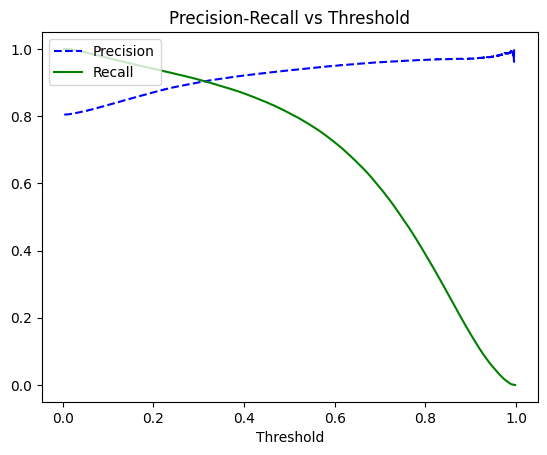

In [16]:
precision, recall, thresholds = precision_recall_curve(y_train, y_pred)
f1_scores = 2*recall*precision / (recall + precision)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print('Best Threshold by F1 Score:', optimal_threshold)

# Plotting Precision-Recall Curve
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.title('Precision-Recall vs Threshold')
plt.show()

### The optimum threshold is 0.24 for this model.

In [22]:
y_pr = model2.predict(x_test)
y_tr = np.array(y_test)
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(len(y_pr)):
    if ((y_pr[i] == 1) and (y_tr[i] == 1)):
        tp = tp +1
    elif ((y_pr[i] == 0) and (y_tr[i] == 1)):
        fn = fn +1
    elif ((y_pr[i] == 0) and (y_tr[i] == 0)):
        tn = tn +1
    else:
        fp = fp +1
recall = tp/(tp+fn)
precision = tp/(tp+fp)
specificity = tn/(tn + fp)
accuracy = (tp+tn)/(tp+fp+tn+fn)
f1_score = 2*recall*precision/(precision + recall)


In [23]:
recall, precision, specificity, accuracy, f1_score

(0.8083353179328412,
 0.9345607401152759,
 0.7689416034739776,
 0.8005840793735812,
 0.8668772294254361)

In [24]:
confusion_matrix = pd.DataFrame({"Actual positives": [tp,fn], "Actual negatives": [fp,tn]})
confusion_matrix.index = ["Predicted positives", "Predicted negatives"]

In [26]:
100*confusion_matrix/(tp + tn + fp + fn)

,Actual positives,Actual negatives
Predicted positives,64.928457,4.546382
Predicted negatives,15.395210,15.129951


### From the confusion matrix we can see that we have significantly reduced the false positives but at the same time we are able to maintain the true positive and true negatives.

In [30]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


# Questionnaire

In [33]:
100*df["loan_status"].value_counts()/df["loan_status"].value_counts().sum()

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: count, dtype: float64

In [35]:
df[["loan_amnt", "installment"]].corr()

,loan_amnt,installment
loan_amnt,1.000000,0.953929
installment,0.953929,1.000000


In [36]:
df["home_ownership"].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [56]:
df.groupby("home_ownership")["loan_status"].agg("mean")

home_ownership
ANY         1.000000
MORTGAGE    0.830439
NONE        0.774194
OTHER       0.857143
OWN         0.793197
RENT        0.773378
Name: loan_status, dtype: float64

In [38]:
df.replace({"Fully Paid":1, "Charged Off": 0}, inplace = True)

In [39]:
df.groupby("grade")["loan_status"].agg("mean")

grade
A    0.937121
B    0.874270
C    0.788191
D    0.711322
E    0.626366
F    0.572120
G    0.521611
Name: loan_status, dtype: float64

In [49]:
df.loc[df["loan_status"] ==1,:].groupby("emp_title")["loan_status"].agg("count").sort_values(ascending = False)

emp_title
Teacher                             3532
Manager                             3321
Registered Nurse                    1476
RN                                  1467
Supervisor                          1425
                                    ... 
 DRIVER                                1
 Data Analyst                          1
 Dealer                                1
 Defense Military Pay Director         1
 Andover Sub-Acute &Rehab Center       1
Name: loan_status, Length: 145235, dtype: int64

In [50]:
df['state'] = df['address'].str.extract(r', (\w{2}) ')

In [51]:
df['state']

0         OK
1         SD
2         WV
3         MA
4         VA
          ..
396025    DC
396026    LA
396027    NY
396028    FL
396029    AR
Name: state, Length: 396030, dtype: object

In [53]:
df.groupby("state")["loan_status"].agg("mean").sort_values(ascending = False)

state
MN    0.819090
NY    0.813535
OR    0.810380
CA    0.809510
VT    0.809422
IN    0.808853
HI    0.808142
OK    0.807987
DE    0.807972
OH    0.806859
NH    0.806542
FL    0.806531
LA    0.806310
ND    0.806066
NJ    0.805810
CT    0.805765
MI    0.805661
ME    0.805651
RI    0.805331
CO    0.805323
IA    0.805227
VA    0.804899
NM    0.804882
AL    0.804581
DC    0.804443
TX    0.804286
MA    0.803902
MD    0.803654
SC    0.803528
AZ    0.803411
UT    0.803398
TN    0.803319
SD    0.802962
MO    0.802421
AK    0.802388
WI    0.802005
AR    0.801837
NC    0.801478
IL    0.801413
NE    0.800635
GA    0.800488
KS    0.800432
ID    0.800374
KY    0.799118
MS    0.798087
MT    0.798053
WA    0.797825
NV    0.797528
PA    0.797216
WV    0.795939
WY    0.791865
Name: loan_status, dtype: float64

# Insights and Recommendations

## 1. The percentage of people paying back the amount is 80% and those who didn't pay back is 20%. Which is a pretty big number. The bank should reduce the money given to unpaid people.  
## 2. People whose home ownership is NONE or RENT have low chances of paying back. Whereas those having Mortage or OTHER have relatively better chances of paying back. So the Bank should focus on such customers.
## 3. We see that there is a high correlation between the grade and payback. The Bank can prioritize on this parameter to decide whether to give or not.
## 4. Also once we determine the probabilty of a person paying back. Bank can then set the interest rate before disbursing the loan. Because higher interest rate is highly correlated with payback percentage. Low interest rate -> good candidate, high interest rate -> risky candidate.
## 5. The Parameters that dont have a significant impact to determine credit worthiness are - Grade (since subgrade already provides the info), address, Purpose/title (it is text data and not very useful for logistic regression model), rent_one_hot (because it can be determined by those who dont have mortage or own home), application_type,term (because it is got from loan amount and duration).
## 6. After training the logistic regression model, the coefficient we get determines how important a parameter is. The Bank has to focus more on the parameters - Employee title, verification status, dti and mortage_one_hot. The parameters that are not so important are - initial_list_status, earliest_cr_line_date, public record, total accounts and revol_balance.
## 7. If bank focuses on precision they would not give to people who won't return back the money, this will reduce NPA. Low false positive rate will give us higher precision and more profit to bank. To achieve this we can use SMOTE with weight balancing model. This approach is effective when the bank wants to play safe. 
## 8. If bank wants to maintain customer relation/satisfaction they could give loan to more risky customer, this way they will be less likely to reject a good customer. To achieve this, bank needs to focus on recall and reduce false negative rate. Model best suited for this is the one without oversampling and weight balancing. 
## 9. If the Bank wants a best overall model with high precision and recall then I would suggest to use model2 with weight balancing and without oversampling. Using this we could be 80% sure that we are correctly classifying positive as positive and negative as negative. This model has good recall as well as specificity. 
## 10. Threshold can be adjusted to increase precision and decrease recall or vice versa. The ideal threshold to maximise both precision and recall and thus maximise f1 score is 0.57 for model 1 (without oversampling/weight balancing) and 0.27 for model 2 (with oversampling/weight balancing).